In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [0]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 100

In [4]:
x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28 * 28), 100).reshape(-1, 28, 28, 1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

ERROR! Session/line number was not unique in database. History logging moved to new session 60


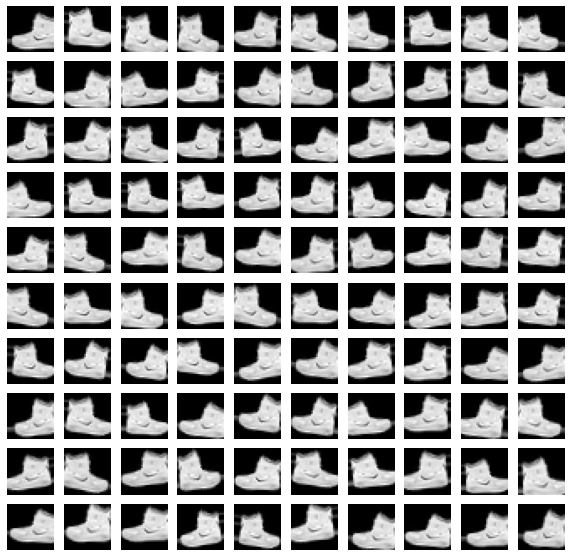

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
  plt.subplot(10, 10, c + 1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28, 28), cmap='gray')
plt.show()

In [6]:
augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)

# 읽어온 Data가 참조형이기 때문에 copy해야한다.
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()

x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [7]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=256, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 67500 samples, validate on 22500 samples
Epoch 1/25
67500/67500 [==============================] - 22s 320us/sample - loss: 0.5611 - acc: 0.7949 - val_loss: 0.5510 - val_acc: 0.7908
Epoch 2/25
67500/67500 [==============================] - 16s 230us/sample - loss: 0.3745 - acc: 0.8647 - val_loss: 0.5146 - val_acc: 0.8020
Epoch 3/25
67500/67500 [==============================] - 16s 230us/sample - loss: 0.3421 - acc: 0.8774 - val_loss: 0.4867 - val_acc: 0.8130
Epoch 4/25
67500/67500 [==============================] - 16s 232us/sample - loss: 0.3146 - acc: 0.8861 - val_loss: 0.4597 - val_acc: 0.8244
Epoch 5/25
67500/67500 [==============================] - 16s 233us/sample - loss: 0.3048 - acc: 0.8905 - val_loss: 0.4345 - val_acc: 0.8405
Epoch 6/25
67500/67500 [==============================] - 16s 232us/sample - loss: 0.2927 - acc: 0.8947 - val_loss: 0.4042 - val_acc: 0.8508
Epoch 7/25
67500/67500 [==============================] - 16s 233us/sample - loss: 0.2860 - acc: 0.8988 

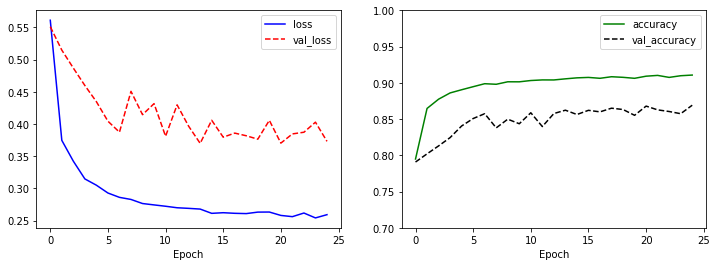

[0.2055103374540806, 0.9268]

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)